In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onion-or-not/OnionOrNot.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/onion-or-not/OnionOrNot.csv')

In [4]:
df

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1
23996,Connecticut TV station under fire after using ...,0
23997,Jurisprudence Fetishist Gets Off On Technicality,1
23998,Employees From Other Department Announce Plan ...,1


In [5]:
df.duplicated().sum()


0

In [6]:
df['label'].value_counts(normalize=True)*100


label
0    62.5
1    37.5
Name: proportion, dtype: float64

In [7]:
df['WordCount'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,text,label,WordCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19
4,"For men looking for great single women, online...",1,23


In [8]:
df['CharCount'] = df['text'].str.len()
df.head()

,text,label,WordCount,CharCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101
4,"For men looking for great single women, online...",1,23,147


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['Stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66,3
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101,0
4,"For men looking for great single women, online...",1,23,147,5


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import re

In [12]:
df['text'] = df['text'].map(lambda x: re.sub(r'[^a-zA-Z\s]', '',x,re.I|re.A))
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.strip()
df.head()

,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs as man tightens p...,1,9,61,0
1,muslim woman denied soda can for fear she coul...,0,14,66,3
2,bold move hulu has announced that theyre gonna...,1,23,134,0
3,despondent jeff bezos realizes hell have to wo...,1,19,101,0
4,for men looking for great single women online ...,1,23,147,5


In [13]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head()


,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs as man tightens p...,1,9,61,0
1,muslim woman denied soda can for fear she coul...,0,14,66,3
2,bold move hulu has announced that theyre gonna...,1,23,134,0
3,despondent jeff bezos realizes hell have to wo...,1,19,101,0
4,for men looking for great single women online ...,1,23,147,5


In [14]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs man tightens priv...,1,9,61,0
1,muslim woman denied soda fear could use weapon,0,14,66,3
2,bold move hulu announced theyre gonna go ahead...,1,23,134,0
3,despondent jeff bezos realizes hell work secon...,1,19,101,0
4,men looking great single women online dating o...,1,23,147,5


In [15]:
import en_core_web_sm

sp = en_core_web_sm.load()

def lemma(input_str):
    s = sp(input_str)
    
    input_list = []
    for word in s:
        w = word.lemma_
        input_list.append(w)
        
    output = ' '.join(input_list)
    return output

df['text'] = df['text'].apply(lambda x: lemma(x))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laugh man tighten privac...,1,9,61,0
1,muslim woman deny soda fear could use weapon,0,14,66,3
2,bold move hulu announce they re go to go ahead...,1,23,134,0
3,despondent jeff bezos realize hell work second...,1,19,101,0
4,man look great single woman online dating offe...,1,23,147,5


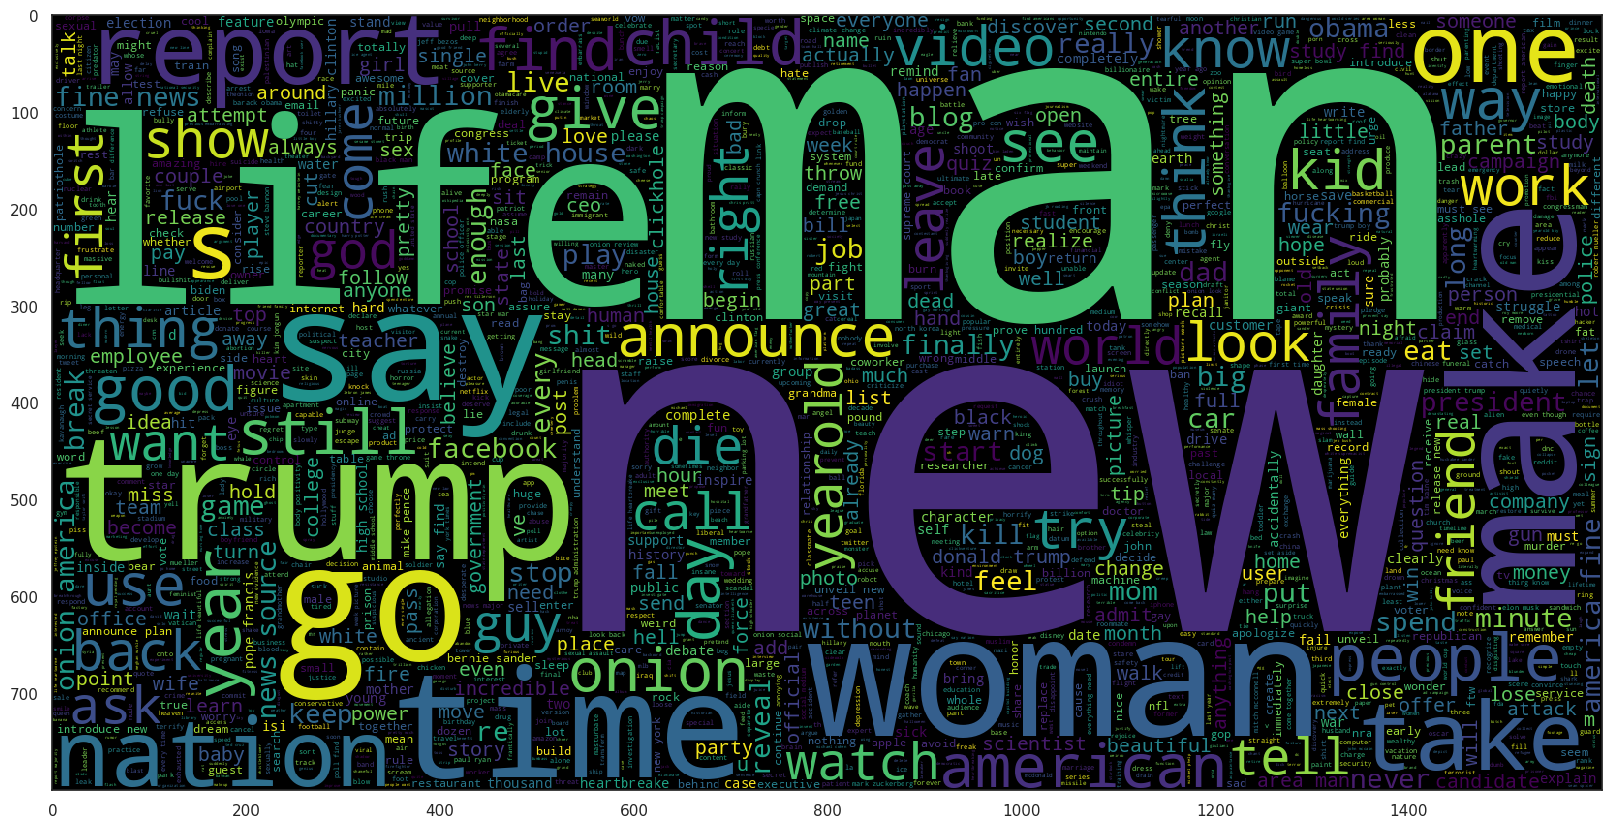

In [16]:
from wordcloud import WordCloud
onion = df[df['label'] == 1].text
news = df[df['label'] == 0].text
# WordCloud for Onion
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(onion))
plt.imshow(wc , interpolation = 'nearest')

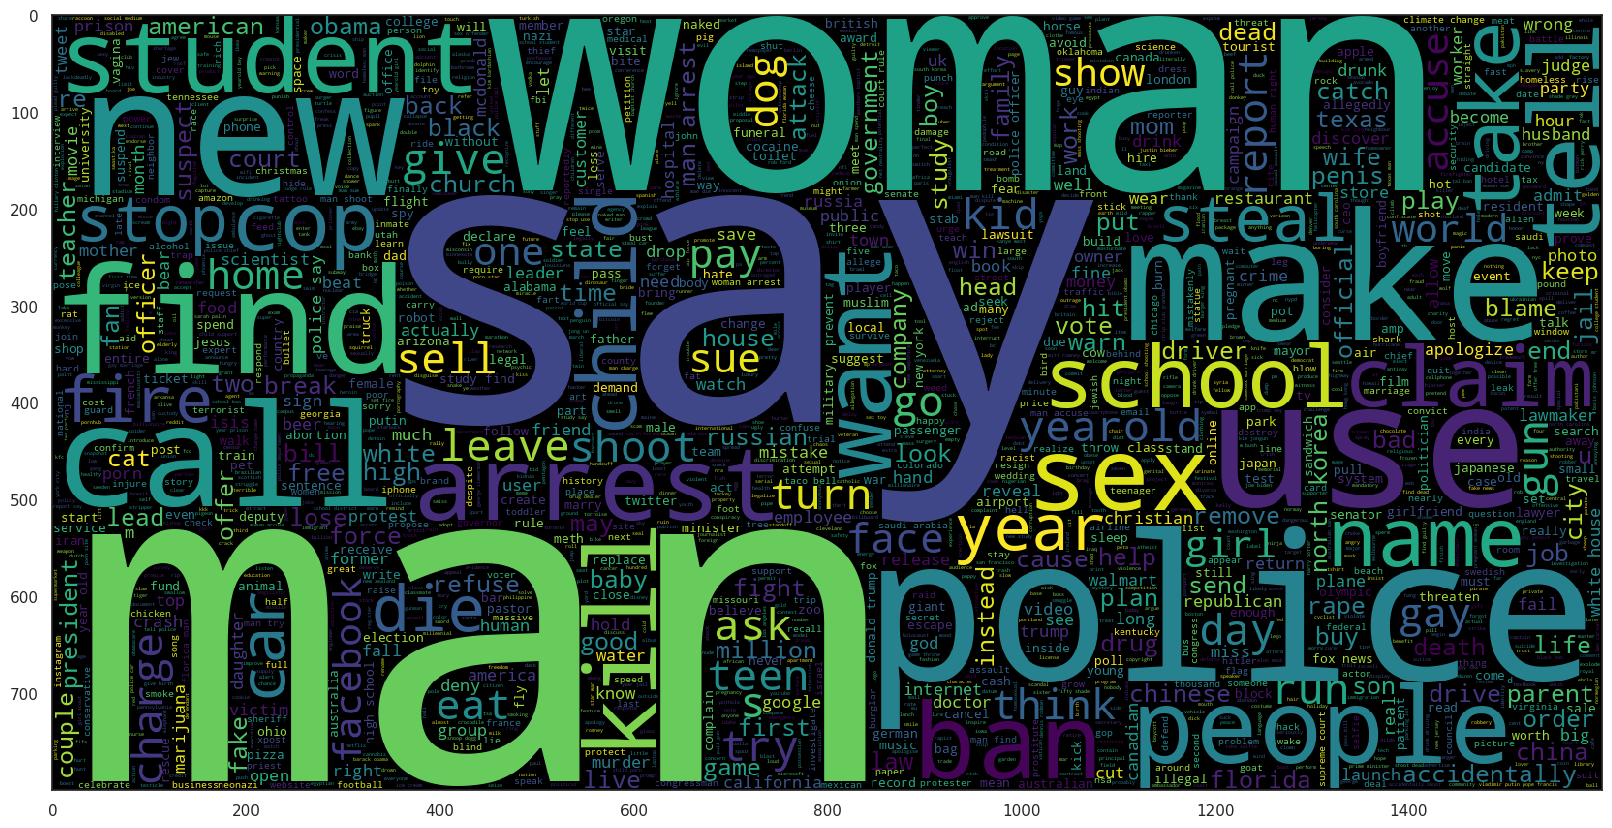

In [17]:
# WordCloud for News
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(news))
plt.imshow(wc , interpolation = 'nearest')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 2000x2000 with 0 Axes>

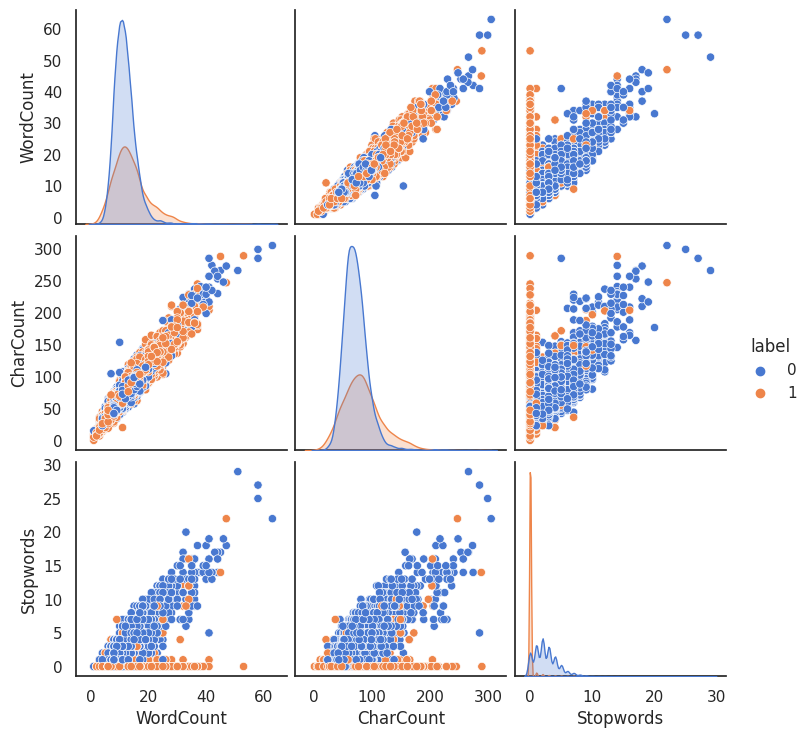

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue="label")
plt.show()

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['text'] is a column of text data
freq = pd.Series(' '.join(df['text']).split()).value_counts()[0:300]
freq = list(freq.index)  # This line is correct

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=len(freq), lowercase=True, analyzer='word',
                         stop_words='english', ngram_range=(1,1))

# Transform text data
df_vect = tfidf.fit_transform(df['text'])

# Convert to DataFrame
text_df = pd.DataFrame(df_vect.toarray(), columns=tfidf.get_feature_names_out())

# Display first few rows
text_df.head()


,accidentally,accuse,actually,admit,allow,america,american,americans,announce,apologize,...,wife,win,woman,work,worker,world,write,wrong,year,yearold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.442533,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706285,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.464287,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.304636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Word2vec

In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK tokenizer data if not already installed
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:


# Load your dataset
#df = pd.read_csv("your_dataset.csv")  # Replace with your actual dataset file

# Tokenize text
df['tokens'] = df['text'].apply(word_tokenize)

# Train Word2Vec model on the entire dataset
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get average Word2Vec embedding per sentence
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert each text into a vector
df['vector'] = df['tokens'].apply(lambda x: get_sentence_vector(x, w2v_model))

# Convert list of vectors into a DataFrame
word2vec_df = pd.DataFrame(df['vector'].to_list())

# Concatenate with original dataset
final_df = pd.concat([df.drop(columns=['tokens', 'vector']), word2vec_df], axis=1)

# Save to CSV if needed
final_df.to_csv("word2vec_transformed.csv", index=False)

# Display first few rows
print(final_df.head())


                                                text  label  WordCount  \
0  entire facebook staff laugh man tighten privac...      1          9   
1       muslim woman deny soda fear could use weapon      0         14   
2  bold move hulu announce they re go to go ahead...      1         23   
3  despondent jeff bezos realize hell work second...      1         19   
4  man look great single woman online dating offe...      1         23   

   CharCount  Stopwords         0         1         2         3         4  \
0         61          0 -0.138178  0.421098  0.171705  0.044581  0.046949   
1         66          3 -0.222360  0.615378  0.236192  0.066641  0.067217   
2        134          0 -0.217680  0.524154  0.194678  0.057648  0.048511   
3        101          0 -0.187320  0.525223  0.206388  0.051685  0.058063   
4        147          5 -0.161464  0.461882  0.181672  0.050155  0.047449   

   ...        90        91        92        93        94        95        96  \
0  ...  0.35

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and labels (y)
X = final_df.drop(columns=['text', 'label'])  # Remove non-numeric columns
y = final_df['label']  # Target variable
X.columns = X.columns.astype(str)  # Ensure all column names are strings

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      3018
           1       0.83      0.91      0.87      1782

    accuracy                           0.90      4800
   macro avg       0.89      0.90      0.89      4800
weighted avg       0.90      0.90      0.90      4800



In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Ensure all column names are strings
final_df.columns = final_df.columns.astype(str)

# Separate features (X) and labels (y)
X = final_df.drop(columns=['text', 'label'])  # Remove non-numeric columns
y = final_df['label']  # Target variable

# Convert feature column names to strings
X.columns = X.columns.astype(str)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Important for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7537 - loss: 0.4994 - val_accuracy: 0.8844 - val_loss: 0.3000
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3210 - val_accuracy: 0.8904 - val_loss: 0.2747
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.2888 - val_accuracy: 0.8977 - val_loss: 0.2606
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.2821 - val_accuracy: 0.8981 - val_loss: 0.2593
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8953 - loss: 0.2686 - val_accuracy: 0.8996 - val_loss: 0.2528
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.2726 - val_accuracy: 0.8952 - val_loss: 0.2553
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2719 - val_accuracy: 0.8835 - val_loss: 0.2746
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8966 - loss: 0.2624 - val_accuracy: 0.8906 - val_

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Ensure all column names are strings
final_df.columns = final_df.columns.astype(str)

# Separate features (X) and labels (y)
X = final_df.drop(columns=['text', 'label'])  # Remove non-numeric columns
y = final_df['label']  # Target variable

# Convert feature column names to strings
X.columns = X.columns.astype(str)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Important for CNN stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data to 3D (samples, time steps, features) for 1D CNN
X_train = np.expand_dims(X_train, axis=2)  # Shape: (samples, features, 1)
X_test = np.expand_dims(X_test, axis=2)    # Shape: (samples, features, 1)

# Define 1D CNN Model
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"1D CNN Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7275 - loss: 0.5162 - val_accuracy: 0.8810 - val_loss: 0.2788
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8890 - loss: 0.2833 - val_accuracy: 0.8902 - val_loss: 0.2852
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8942 - loss: 0.2736 - val_accuracy: 0.8958 - val_loss: 0.2609
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8920 - loss: 0.2748 - val_accuracy: 0.8931 - val_loss: 0.2589
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8976 - loss: 0.2645 - val_accuracy: 0.8963 - val_loss: 0.2559
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9029 - loss: 0.2502 - val_accuracy: 0.8983 - val_loss: 0.2478
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8985 - loss: 0.2567 - val_accuracy: 0.8950 - val_loss: 0.2615
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9042 - loss: 0.2510 - val_accuracy: 0.885

In [22]:
text_df['WordCount'] = df['WordCount']
text_df['CharCount'] = df['CharCount']
text_df['Stopwords'] = df['Stopwords']
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 105 entries, text to 99
dtypes: float64(100), int64(4), object(1)
memory usage: 19.2+ MB


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Logistic

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))


Accuracy: 0.9024
[[4129  443]
 [ 260 2368]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4572
           1       0.84      0.90      0.87      2628

    accuracy                           0.90      7200
   macro avg       0.89      0.90      0.90      7200
weighted avg       0.90      0.90      0.90      7200



## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test,y_rfc_pred))

Accuracy: 0.9031
[[4128  444]
 [ 254 2374]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4572
           1       0.84      0.90      0.87      2628

    accuracy                           0.90      7200
   macro avg       0.89      0.90      0.90      7200
weighted avg       0.91      0.90      0.90      7200



## Decision 

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_dtc_pred = dtc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_dtc_pred))
print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test,y_dtc_pred))

Accuracy: 0.8614
[[4090  482]
 [ 516 2112]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4572
           1       0.81      0.80      0.81      2628

    accuracy                           0.86      7200
   macro avg       0.85      0.85      0.85      7200
weighted avg       0.86      0.86      0.86      7200



## XGBoost

In [35]:

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_std, y_train)
y_xgb_pred = xgb.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_xgb_pred))
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test,y_xgb_pred))


Accuracy: 0.9090
[[4091  481]
 [ 174 2454]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      4572
           1       0.84      0.93      0.88      2628

    accuracy                           0.91      7200
   macro avg       0.90      0.91      0.90      7200
weighted avg       0.91      0.91      0.91      7200



### We got 90.9% Accuracy by using XGBoost Model and Word2Vec